In [38]:
pip show plotly

Name: plotlyNote: you may need to restart the kernel to use updated packages.

Version: 5.24.1
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: C:\Users\Kasia\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: packaging, tenacity
Required-by: chart-studio, cufflinks


In [39]:
pip show chart-studio

Name: chart-studio
Version: 1.1.0
Summary: Utilities for interfacing with plotly's Chart Studio
Home-page: https://plot.ly/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: C:\Users\Kasia\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: plotly, requests, retrying, six
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [40]:
pip show cufflinks

Name: cufflinksNote: you may need to restart the kernel to use updated packages.

Version: 0.17.3
Summary: Productivity Tools for Plotly + Pandas
Home-page: https://github.com/santosjorge/cufflinks
Author: Jorge Santos
Author-email: santos.jorge@gmail.com
License: MIT
Location: C:\Users\Kasia\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: colorlover, ipython, ipywidgets, numpy, pandas, plotly, setuptools, six
Required-by: 


In [5]:
import cufflinks as cf
import plotly.io as pio

cf.go_offline()  # This activates offline mode for cufflinks
pio.renderers.default = "notebook"  # Or "notebook" if you're in a Jupyter Notebook


In [6]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Initialize notebook mode to enable offline plotting
init_notebook_mode(connected=True)


In [7]:
import plotly.offline as pyo
download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [8]:
import cufflinks as cf
cf.go_offline()


**Pobierz dane dotyczące cen akcji KGHM oraz cen miedzi.**

In [10]:
import pandas as pd
df_akcje_KGHM = pd.read_csv('kgh_d.csv')
df_akcje_KGHM.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2015-01-02,102.45,102.83,101.97,102.40,309987
1,2015-01-05,102.16,102.88,99.91,100.09,479228
2,2015-01-07,100.53,105.45,99.67,104.89,966372
3,2015-01-08,105.35,107.15,105.35,107.11,711805
4,2015-01-09,107.15,107.15,103.87,104.33,563221


In [11]:
df_ceny_miedzi = pd.read_csv('ca_c_f_d.csv')
df_ceny_miedzi.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie
0,2015-01-02,6309.0,6309.0,6309.0,6309.0
1,2015-01-05,6216.0,6216.0,6216.0,6216.0
2,2015-01-06,6191.0,6191.0,6191.0,6191.0
3,2015-01-07,6170.0,6170.0,6170.0,6170.0
4,2015-01-08,6230.5,6230.5,6230.5,6230.5


**Stwórz dwa osobne wykresy liniowe (jeden pod drugim) – jeden niech przedstawia ceny zamknięcia KGHM, drugi niech przedstawia ceny miedzi (na podstawie kolumn "Zamknięcie").
Jako trzeci element wykresu dodaj tabelę zestawiającą ceny zamknięcia KGHM oraz miedzi w kolejnych dniach (ponownie na podstawie kolumny "Zamknięcie").**

In [31]:
# Łączenie ramki df_akcje_KGHM i df_ceny_miedzi na podstawie kolumny 'Data'
data = pd.merge(df_akcje_KGHM[['Data', 'Zamkniecie']], df_ceny_miedzi[['Data', 'Zamkniecie']], on='Data')
data.head()  #sprawdenie nazw kolumn

,Data,Zamkniecie_x,Zamkniecie_y
0,2015-01-02,102.40,6309.0
1,2015-01-05,100.09,6216.0
2,2015-01-07,104.89,6170.0
3,2015-01-08,107.11,6230.5
4,2015-01-09,104.33,6151.0


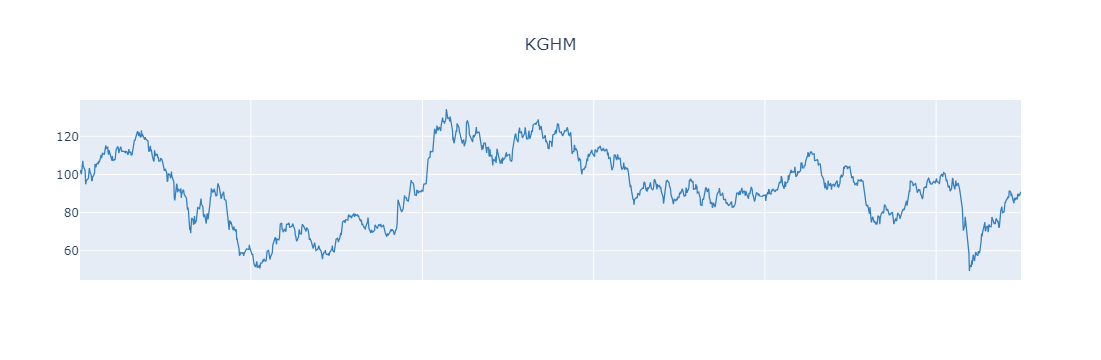

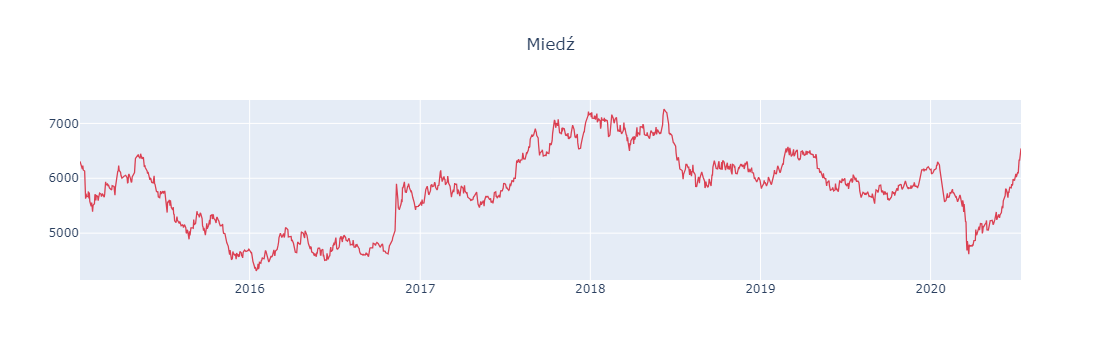

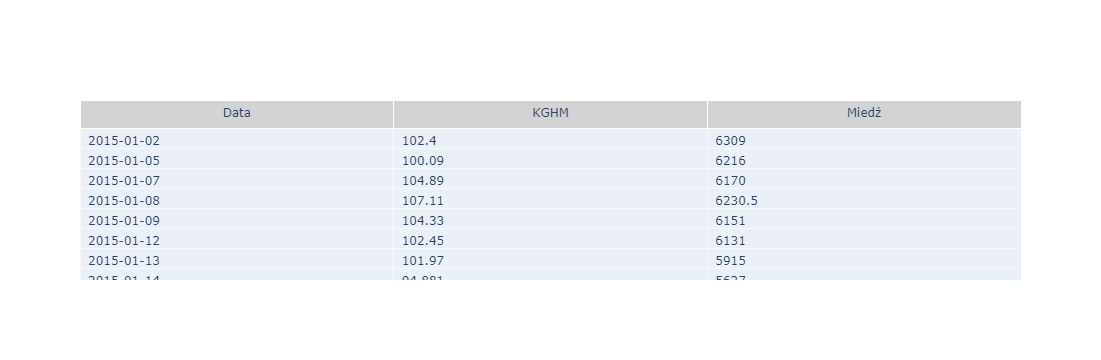

In [36]:
#WYKRES 1
df_akcje_KGHM.iplot(kind='scatter',
x='Data',
y='Zamkniecie',
color='blue',  # Kolor linii wykresu
layout=dict(
        title=dict(text='KGHM', x=0.5),  # Wyśrodkowanie tytułu
        xaxis=dict(showticklabels=False),  # Ukrycie podpisów osi x  
))

# WYKRES 2
df_ceny_miedzi.iplot(kind='scatter',
x='Data',
y='Zamkniecie',
color='red',  # Kolor linii wykresu
layout=dict(title=dict(text='Miedź', x=0.5)
))

# TABELA
import plotly.graph_objects as go

# Przekształcenie danych na format odpowiedni do plotly
header = ["Data", "KGHM", "Miedź"]
table_data = [data['Data'].tolist(), data['Zamkniecie_x'].tolist(), data['Zamkniecie_y'].tolist()]

# Tworzenie wykresu
fig = go.Figure(data=[go.Table(
    header=dict(values=header, fill_color='lightgray', align='center'),
    cells=dict(values=table_data, align='left',
            line_color='white',  # Kolor linii siatki
            line_width=0.5)     # Grubość linii siatki)
)])

# Wyświetlenie tabeli
fig.show()
